# 08 Fundamentals of  Linear classification
*This notebook illustrates methods to implement tasks using linear classification*
***
Alessandro Tufano, Ph.D. 2021

### Import Packages

In [1]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sys; sys.path.insert(0, '..') #add the above level with the package


from IPython.display import display, HTML

#import data
from sklearn.datasets import load_breast_cancer
#Load the dataset
data = load_breast_cancer()

# define X dataframe
X = data.data
X = pd.DataFrame(X)

# define y dataframe
y = data.target
y = pd.DataFrame(y, columns=['target'])


### Hyperparameters gridsearch and fit linear models

In [2]:
# import models
import sys; sys.path.insert(0, '..') #add the above level with the package
from analogistics.learning.linear_grids import GridSearchLinear

grid_search_linear = GridSearchLinear()
D_res_regr = grid_search_linear.train_models_classification(X, y)
D_res_regr

Fitting 3 folds for each of 6 candidates, totalling 18 fits


C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [0.95538058 0.95538058 0.95538058        nan 0.97112861 0.97112861]
  category=UserWarning
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits


C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan 0.94225722        nan 0.93963255
        nan 0.94750656        nan 0.95013123]
  category=UserWarning
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to th

,MODEL_NAME,MODEL,PARAMS,SCORE_TEST,ACCURACY,PRECISION,RECALL,F1,REPORT
0,linear_discriminant_analysis,"LinearDiscriminantAnalysis(shrinkage='auto', s...","{'shrinkage': 'auto', 'solver': 'lsqr'}",0.971129,0.957447,0.957793,0.957447,0.957138,Empty DataFrame Columns: [] Index: []
0,quadratic_discriminant_analysis,QuadraticDiscriminantAnalysis(),{'priors': None},0.950131,0.962766,0.962946,0.962766,0.962827,Empty DataFrame Columns: [] Index: []
0,logistic_regression,"LogisticRegression(fit_intercept=False, penalt...","{'dual': False, 'fit_intercept': False, 'penal...",0.950131,0.962766,0.963635,0.962766,0.962940,Empty DataFrame Columns: [] Index: []


### Evaluate the best model

In [3]:
#Split into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#retrieve the best model from the grid search
best_model = D_res_regr.iloc[0]['MODEL']
best_model

y_pred = best_model.predict(x_test)

### Accuracy

In [4]:
score = best_model.score(x_test, y_test)
print(f"Accuracy: {score}")

Accuracy: 0.965034965034965


### Confusion matrix

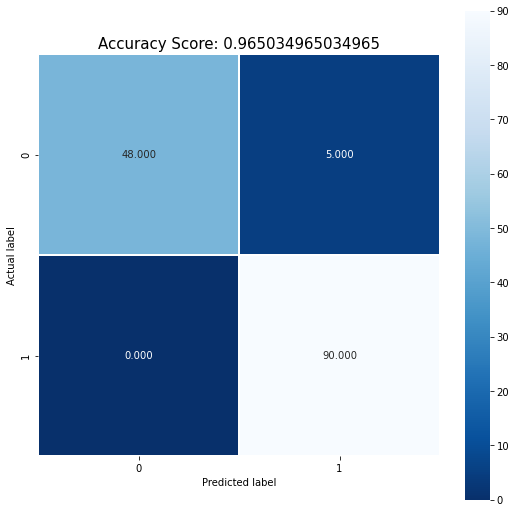

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

#define the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)

#plot the confusion matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

### Area under the ROC curve

AUC: 0.9528301886792453


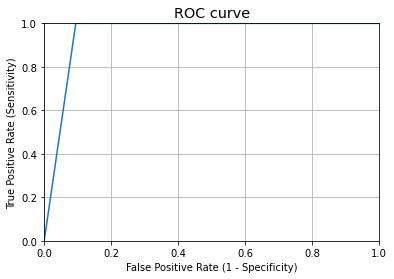

In [6]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

# calculate the AUC
print(f"AUC: {metrics.roc_auc_score(y_test, y_pred)}")

### Feature relevance

,feature_name,coefficients
0,0,-0.249459
1,1,-0.071112
2,2,-0.024935
3,3,0.002373
4,4,-12.373767
5,5,29.468702
6,6,-6.023630
7,7,-58.114847
8,8,8.451700
9,9,98.062484


Text(0.5, 1.0, 'LDA coefficients')

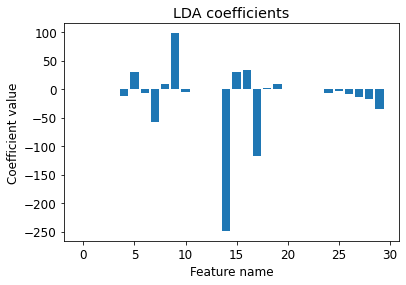

In [7]:
#Print coefficients
#create a dataframe with one row for each feature of X
features_list = list(X.columns)
D_assessment = pd.DataFrame(features_list,columns=['feature_name'])

#extract coefficients
coefficients = best_model.coef_.reshape(-1,1)
D_assessment['coefficients'] = coefficients


display(HTML(D_assessment.to_html()))
plt.bar(D_assessment['feature_name'],D_assessment['coefficients'])
plt.xlabel('Feature name')
plt.ylabel('Coefficient value')
plt.title('LDA coefficients')